In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)

params={'legend.fontsize':'18','axes.labelsize':'18',
        'axes.titlesize':'18','xtick.labelsize':'18',
        'ytick.labelsize':'18','lines.linewidth':2,
        'axes.linewidth':2,'animation.html': 'html5',
        'figure.figsize':(8,6)}
plt.rcParams.update(params)
plt.rcParams.update({'figure.max_open_warning': 0})
import matplotlib.patches as patches

from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

import scipy.io as sio

from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
cosmo.age(1)

import seaborn as sns
import pandas as pd
from astropy.io import fits

sns.set(font_scale=2)
sns.set_style("white", {"axes.grid": "False"})
sns.set_style("ticks")

from matplotlib import pyplot as plt

import statsmodels.api as sm
lowess = sm.nonparametric.lowess

# Step 1: import catalogs and galaxy IDs [and flags]

In [5]:
# SEDs in magnitudes
candels_cat_small = np.loadtxt('../catalogs/CANDELS_GDSS_workshop.dat')

# subtracting 1 from the ID for python indexing
cat_small_ids = candels_cat_small[0:,0] - 1
cat_small_z = candels_cat_small[0:,1]

print(str(cat_small_z.shape[0])+' galaxies in the small catalog.')

#------------------------------------------------------------------------------

candels_cat_z1 = np.loadtxt('../catalogs/CANDELS_GDSS_workshop_z1.dat')

# subtracting 1 from the ID for python indexing
cat_z1_ids = candels_cat_z1[0:,0] - 1
cat_z1_z = candels_cat_z1[0:,1]
print(str(cat_z1_z.shape[0])+' galaxies in the z~1 catalog.')

#------------------------------------------------------------------------------

candels_cat_z3 = np.loadtxt('../catalogs/CANDELS_GDSS_workshop_z3.dat')

# subtracting 1 from the ID for python indexing
cat_z3_ids = candels_cat_z3[0:,0] - 1
cat_z3_z = candels_cat_z3[0:,1]

print(str(cat_z3_z.shape[0])+' galaxies in the z~3 catalog.')

z1flag_cat = np.genfromtxt('../catalogs/flags_z1.dat')
z1flag_ids = z1flag_cat[0:,0]

z1_mask = np.zeros_like(cat_z1_ids)
for i in range(len(z1flag_ids)):
    z1_mask[cat_z1_ids == z1flag_ids[i]-1 ] = 1
    
z3flag_cat = np.genfromtxt('../catalogs/flags_z3.dat')
z3flag_ids = z3flag_cat[0:,0]

z3_mask = np.zeros_like(cat_z3_ids)
for i in range(len(z3flag_ids)):
    z3_mask[cat_z3_ids == z3flag_ids[i]-1 ] = 1

23 galaxies in the small catalog.
371 galaxies in the z~1 catalog.
161 galaxies in the z~3 catalog.


# Step 2: import outputs of all the SED fitting codes.

In [6]:
%run import_scripts/import_p16_fits.py
%run import_scripts/import_dense_basis_fits.py
%run import_scripts/import_fitsed_fits.py
%run import_scripts/import_nima_lephare_fits.py
%run import_scripts/import_marianna_zphot_fits.py
%run import_scripts/import_prospector_fits.py
%run import_scripts/import_bagpipes_fits.py
%run import_scripts/import_cigale_fits_2020.py
%run import_scripts/import_interrogator_fits.py
%run import_scripts/import_speedyMC_fits.py
%run import_scripts/import_eazy_fits.py
%run import_scripts/import_magphys_fits.py
%run import_scripts/import_beagle_fits.py
%run import_scripts/import_sed3fit_fits.py

imported pacifici+16 fits.
imported dense basis fits.
imported FITSED (salmon+15?) fits.
imported Nima's LePhare fits.
imported Marianna's (zPhot) fits.
imported Prospector fits.
imported bagpipes fits.
imported CIGALE files (z=1 fits from Oct 2020, z=3 fits from 27 Feb 2019)
imported interrogator fits.
imported SpeedyMC fits.
imported eazy fits.
imported magphys fits.
imported beagle fits.
imported SED3fit fits.


# Step 3: Take everyone's data and put it in a dataframe, then start the visualization and analysis.

## define dataframes below for Mass, SFR and dust at z~1. Change the dictionary labels here to change the x-tick labels in the violin- and box-plots.

In [7]:
##need to put the codes in alphabetical order

brett_mass_z1_masked = brett_mass_z1
brett_mass_z1_masked[brett_mass_z1_masked < 0] = np.nan

nima_mass_z1_masked = nima_mass_z1
nima_mass_z1_masked[nima_mass_z1_masked < 0] = np.nan

z1_cat_mass_dict = {
                    'Bagpipes': bagpipes_mass_z1, 
                    'Beagle': beagle_mass_z1,
                    'Cigale':cigale_mass, 
                    'Dense Basis': DB_mass_z1.ravel(), 
                    'FITSED':brett_mass_z1_masked, 
                    'Interrogator':interrogator_mass_z1_pegase.ravel(),
                    'LePhare':nima_mass_z1_masked, 
                    'MAGPHYS':magphys_mass_z1, 
                    'Pacifici+16': cami_mass_z1.ravel(), 
                    'Prospector': prospector_mass_z1.ravel(),
                    'SED3FIT':sed3fit_mass_z1,
                    'SpeedyMC':speedy_mass_z1,
                    'zPhot':marianna_mass_z1}
z1_cat_mass = pd.DataFrame(data=z1_cat_mass_dict)

z1_cat_mass[z1_cat_mass < 7] = np.nan

#-----------------------------------------------------------------------
# getting mass uncertainties as well


nima_mass_uncert_z1_masked = nima_mass_hi_z1 - nima_mass_lo_z1
nima_mass_uncert_z1_masked[nima_mass_z1 < 0] = np.nan

brett_mass_uncert_z1_masked = brett_mass_hi_z1 - brett_mass_lo_z1
brett_mass_uncert_z1_masked[brett_mass_z1 < 0] = np.nan
#brett_mass_uncert_z1_masked[brett_mass_uncert_z1_masked > 1] = np.nan

z1_cat_mass_uncert_dict = {
                    'Bagpipes': bagpipes_mass_hi_z1 - bagpipes_mass_lo_z1, 
                    'Beagle': beagle_mass_hi_z1 - beagle_mass_lo_z1,
                    'Cigale': cigale_mass_err*2, 
                    'Dense Basis': DB_mass_hi_z1 - DB_mass_lo_z1, 
                    'FITSED':brett_mass_uncert_z1_masked, 
                    'Interrogator':(interrogator_mass_z1_hi_pegase.ravel() - interrogator_mass_z1_lo_pegase.ravel()),
                    'LePhare':nima_mass_uncert_z1_masked, 
                    'MAGPHYS':magphys_mass_hi_z1 - magphys_mass_lo_z1, 
                    'Pacifici+16': cami_mass_hi_z1 - cami_mass_lo_z1, 
                    'Prospector': (prospector_mass_hi_z1.ravel() - prospector_mass_lo_z1.ravel()),
                    'SED3FIT':sed3fit_mass_z1_high - sed3fit_mass_z1_low,
                    'SpeedyMC':speedy_mass_hi_z1 - speedy_mass_lo_z1,
                    'zPhot':marianna_mass_hi_z1 - marianna_mass_lo_z1} 
z1_cat_mass_uncert = pd.DataFrame(data=z1_cat_mass_uncert_dict)

z1_cat_mass_uncert[z1_cat_mass < 7] = np.nan
z1_cat_mass_uncert[z1_cat_mass_uncert > 2] = np.nan



#-----------------------------------------------------------------------

z1_cat_sfr_dict = {
                    'Bagpipes': bagpipes_sfr_z1, 
                    'Beagle': beagle_sfr_z1,
                    'Cigale':cigale_sfr, 
                    'Dense Basis': DB_sfr_z1.ravel(), 
                    'FITSED':brett_sfr_z1, 
                    'Interrogator':interrogator_sfr_z1_pegase,
                    'LePhare':nima_sfr_z1, 
                    'MAGPHYS':magphys_sfr_z1, 
                    'Pacifici+16': cami_sfr_z1.ravel(), 
                    'Prospector': prospector_sfr_z1.ravel(),
                    'SED3FIT':sed3fit_sfr_z1,
                    'SpeedyMC':speedy_sfr_z1,
                    'zPhot':marianna_sfr_z1} 
z1_cat_sfr = pd.DataFrame(data=z1_cat_sfr_dict)

z1_cat_sfr[z1_cat_sfr < -3] = -3 # fixes the stretching that a lot of the SFR distributions show due to exrtemely low SFRs


#-----------------------------------------------------------------------
# getting sfr uncertainties as well


nima_sfr_uncert_z1_masked = nima_sfr_hi_z1 - nima_sfr_lo_z1
nima_sfr_uncert_z1_masked[nima_sfr_z1 < 0] = np.nan

brett_sfr_uncert_z1_masked = brett_sfr_hi_z1 - brett_sfr_lo_z1
brett_sfr_uncert_z1_masked[brett_sfr_z1 < 0] = np.nan
#brett_sfr_uncert_z1_masked[brett_sfr_uncert_z1_masked > 1] = np.nan

z1_cat_sfr_uncert_dict = {
                    'Bagpipes': bagpipes_sfr_hi_z1 - bagpipes_sfr_lo_z1, 
                    'Beagle': beagle_sfr_hi_z1 - beagle_sfr_lo_z1,
                    'Cigale':cigale_sfr_err*2, 
                    'Dense Basis': DB_sfr_hi_z1 - DB_sfr_lo_z1, 
                    'FITSED':brett_sfr_uncert_z1_masked, 
                    'Interrogator':(interrogator_sfr_z1_hi_pegase.ravel() - interrogator_sfr_z1_lo_pegase.ravel()),
                    'LePhare':nima_sfr_uncert_z1_masked, 
                    'MAGPHYS':magphys_sfr_hi_z1 - magphys_sfr_lo_z1, 
                    'Pacifici+16': cami_sfr_hi_z1 - cami_sfr_lo_z1, 
                    'Prospector': (prospector_sfr_hi_z1.ravel() - prospector_sfr_lo_z1.ravel()),
                    'SED3FIT':sed3fit_sfr_z1_high - sed3fit_sfr_z1_low,
                    'SpeedyMC':speedy_sfr_hi_z1 - speedy_sfr_lo_z1,
                    'zPhot':marianna_sfr_hi_z1 - marianna_sfr_lo_z1} 
z1_cat_sfr_uncert = pd.DataFrame(data=z1_cat_sfr_uncert_dict)

z1_cat_sfr_uncert[z1_cat_mass < 7] = np.nan
z1_cat_sfr_uncert[z1_cat_sfr_uncert > 2] = np.nan
z1_cat_sfr_uncert = np.abs(z1_cat_sfr_uncert)


#-----------------------------------------------------------------------


interrogator_Av_z1_pegase[interrogator_Av_z1_pegase < 0] = np.nan

z1_cat_Av_dict = {
                    'Bagpipes': bagpipes_Av_z1, 
                    'Beagle': beagle_Av_z1,
                    'Cigale':cigale_Av, 
                    'Dense Basis': DB_Av_z1.ravel(), 
                    'FITSED':brett_Av_z1, 
                    'Interrogator':interrogator_Av_z1_pegase,
                    'LePhare':nima_Av_z1, 
                    'MAGPHYS':magphys_Av_z1, 
                    'Pacifici+16': cami_Av_z1.ravel(), 
                    'Prospector': prospector_Av_z1.ravel(),
                    'SED3FIT':sed3fit_av_z1,
                    'SpeedyMC':speedy_Av_z1,
                    'zPhot':marianna_Av_z1} 
z1_cat_Av = pd.DataFrame(data=z1_cat_Av_dict)



#-----------------------------------------------------------------------


interrogator_Av_z1_pegase[interrogator_Av_z1_pegase < 0] = np.nan

z1_cat_Av_uncert_dict = {
                    'Bagpipes': (bagpipes_Av_hi_z1 - bagpipes_Av_lo_z1), 
                    'Beagle': (beagle_Av_hi_z1 - beagle_Av_lo_z1),
                    'Cigale':cigale_Av_err*2, 
                    'Dense Basis': (DB_Av_hi_z1.ravel() - DB_Av_lo_z1.ravel()), 
                    'FITSED':(brett_Av_hi_z1 - brett_Av_lo_z1), 
                    'Interrogator':(interrogator_Av_z1_hi_pegase - interrogator_Av_z1_lo_pegase),
                    'LePhare':np.ones_like(nima_Av_z1)*np.nan, 
                    'MAGPHYS':(magphys_Av_hi_z1 - magphys_Av_lo_z1), 
                    'Pacifici+16': (cami_Av_hi_z1.ravel() - cami_Av_lo_z1.ravel()), 
                    'Prospector': (prospector_Av_hi_z1.ravel() - prospector_Av_lo_z1.ravel()),
                    'SED3FIT':(sed3fit_av_z1_high - sed3fit_av_z1_low),
                    'SpeedyMC':(speedy_Av_hi_z1 - speedy_Av_lo_z1),
                    'zPhot':np.ones_like(marianna_Av_z1)*np.nan} 
z1_cat_Av_uncert = pd.DataFrame(data=z1_cat_Av_uncert_dict)



print(z1_cat_mass.shape)
print(z1_cat_sfr.shape)
print(z1_cat_Av.shape)

(371, 13)
(371, 13)
(371, 13)


# make (and save) plots: 

## main sequence

# plots for individual MS

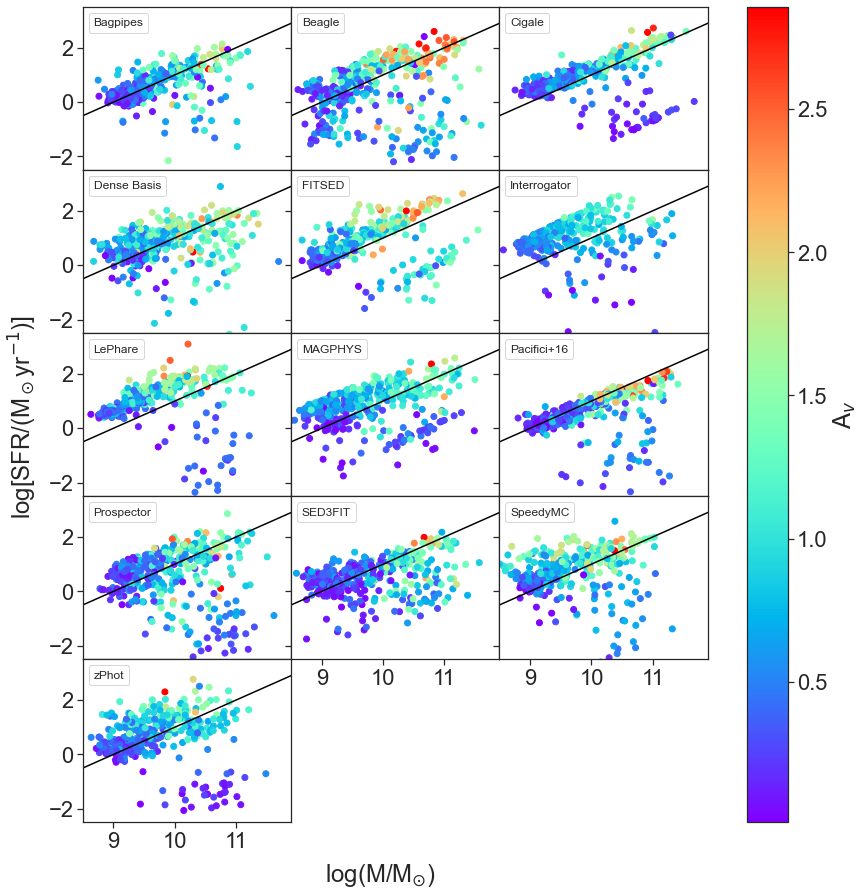

In [58]:
fig, ax0 = plt.subplots(5,3,figsize=(14,15))
ax = ax0.flatten()
fig.subplots_adjust(wspace=0, hspace=0)

for a in [ax[1],ax[2],ax[4],ax[5],ax[7],ax[8]]:
    a.set_yticklabels([])
    a.set_xticklabels([])
    
for a in [ax[0],ax[3],ax[6]]:
    a.set_xticklabels([])
    
for a in [ax[10],ax[11]]:
    a.set_yticklabels([])
    
for i, code in enumerate(z1_cat_mass_dict):
    tax = ax[i]
    mass = z1_cat_mass_dict[code]
    sfr = z1_cat_sfr_dict[code]
    av = z1_cat_Av_dict[code]
    tax.plot([8,12],[-1,3],c='black')
    if i==0:
        first = tax.scatter(mass,sfr,c=av,cmap='rainbow',label=code)
    if i!=0:
        tax.scatter(mass,sfr,c=av,cmap='rainbow',label=code)
    tax.set_ylim(-2.5,3.5)
    tax.set_xlim(8.5,11.9)
    leg = tax.legend(handlelength=0, handletextpad=0, fancybox=None, prop={'size': 12})
    for item in leg.legendHandles:
        item.set_visible(False)
    
# Make empty subplots empty
if i != len(ax)-1:
    for j in range(i+1, len(ax)):
        ax[j].axis('off')
        
# Put colorbar over entire figure
fig.colorbar(first, ax=ax, label="A$_v$")

fig.text(0.42, 0.07, r'log(M/M$_{\odot}$)', ha='center')
fig.text(0.05, 0.5, r'log[SFR/(M$_\odot$yr$^{-1}$)]', va='center', rotation='vertical')

plt.savefig("../figures/fig9_ms_all.png", dpi=600, bbox_inches='tight')

fig.show()

FileNotFoundError: [Errno 2] No such file or directory: '../../../../../PAPERI/MY/whitepaper/figures/MS_bagpipes.png'

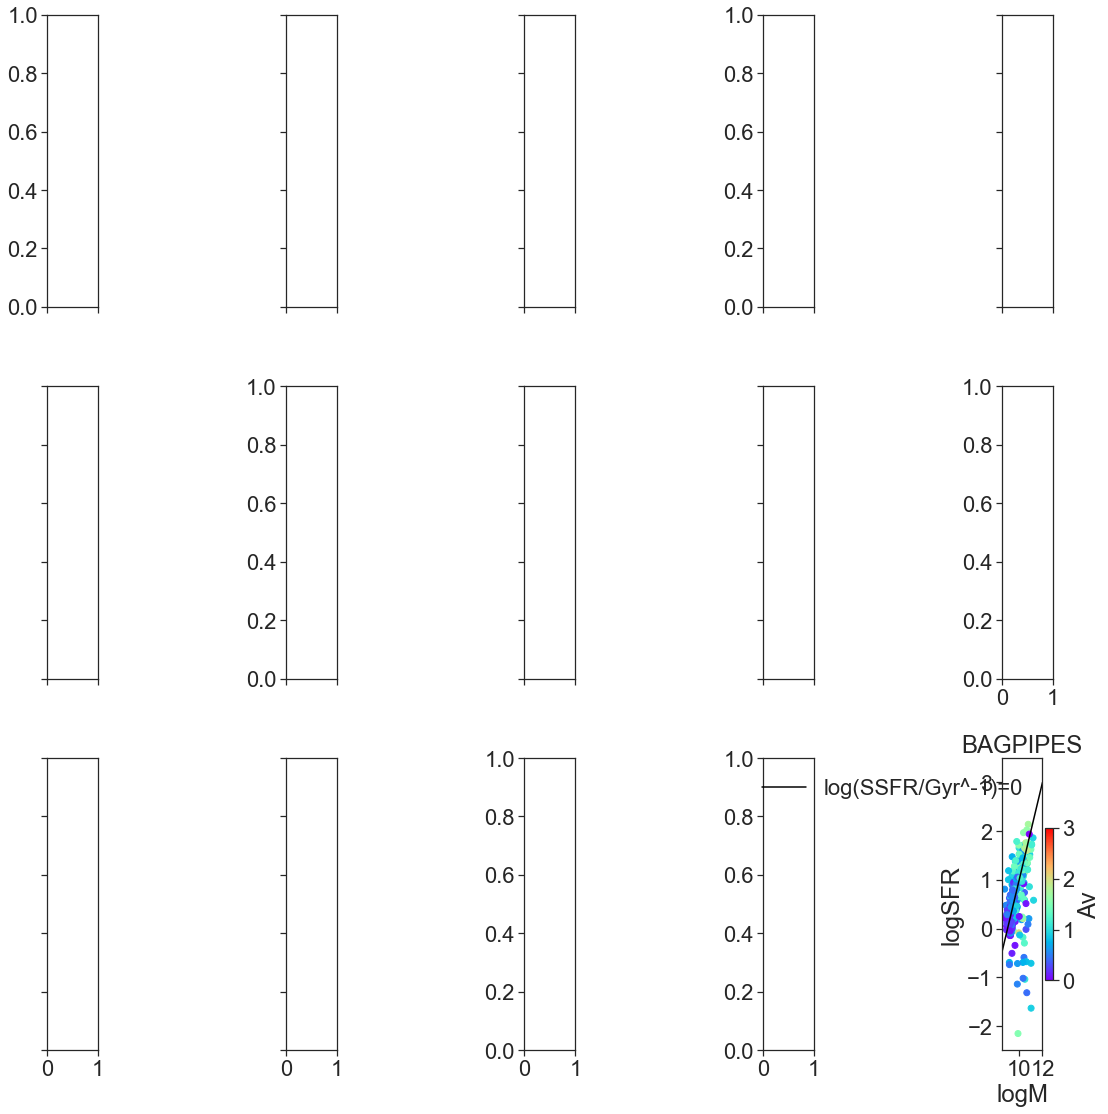

In [10]:

plt.plot([8,12],[-1,3],c='black',label='log(SSFR/Gyr^-1)=0')
plt.scatter(bagpipes_mass_z1,bagpipes_sfr_z1,c=bagpipes_Av_z1,cmap='rainbow')
plt.xlim(8.5,12)
plt.ylim(-2.5,3.5)
plt.clim(0,3)
plt.colorbar(label="Av")
plt.title("BAGPIPES")
plt.xlabel("logM")
plt.ylabel("logSFR")
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig("../../../../../PAPERI/MY/whitepaper/figures/MS_bagpipes.png")
plt.show()

plt.figure(figsize=[8,5])
plt.plot([8,12],[-1,3],c='black')
plt.scatter(beagle_mass_z1,beagle_sfr_z1,c=beagle_Av_z1,cmap='rainbow')
plt.xlim(8.5,12)
plt.ylim(-2.5,3.5)
plt.clim(0,3)
plt.colorbar(label="Av")
plt.title("BEAGLE")
plt.xlabel("logM")
plt.ylabel("logSFR")
plt.tight_layout()
plt.savefig("../../../../../PAPERI/MY/whitepaper/figures/MS_beagle.png")
plt.show()

plt.figure(figsize=[8,5])
plt.plot([8,12],[-1,3],c='black')
plt.scatter(cigale_mass,cigale_sfr,c=cigale_Av,cmap='rainbow')
plt.xlim(8.5,12)
plt.ylim(-2.5,3.5)
plt.clim(0,3)
plt.colorbar(label="Av")
plt.title("CIGALE")
plt.xlabel("logM")
plt.ylabel("logSFR")
plt.tight_layout()
plt.savefig("../../../../../PAPERI/MY/whitepaper/figures/MS_cigale.png")
plt.show()

plt.figure(figsize=[8,5])
plt.plot([8,12],[-1,3],c='black')
plt.scatter(DB_mass_z1.ravel(),DB_sfr_z1.ravel(),c=DB_Av_z1.ravel(),cmap='rainbow')
plt.xlim(8.5,12)
plt.ylim(-2.5,3.5)
plt.clim(0,3)
plt.colorbar(label="Av")
plt.title("Dense Basis")
plt.xlabel("logM")
plt.ylabel("logSFR")
plt.tight_layout()
plt.savefig("../../../../../PAPERI/MY/whitepaper/figures/MS_db.png")
plt.show()

plt.figure(figsize=[8,5])
plt.plot([8,12],[-1,3],c='black')
plt.scatter(brett_mass_z1_masked,brett_sfr_z1,c=brett_Av_z1,cmap='rainbow')
plt.xlim(8.5,12)
plt.ylim(-2.5,3.5)
plt.clim(0,3)
plt.colorbar(label="Av")
plt.title("FITSED")
plt.xlabel("logM")
plt.ylabel("logSFR")
plt.tight_layout()
plt.savefig("../../../../../PAPERI/MY/whitepaper/figures/MS_fitsed.png")
plt.show()

plt.figure(figsize=[8,5])
plt.plot([8,12],[-1,3],c='black')
plt.scatter(interrogator_mass_z1_pegase.ravel(),interrogator_sfr_z1_pegase.ravel(),c=interrogator_Av_z1_pegase.ravel(),cmap='rainbow')
plt.xlim(8.5,12)
plt.ylim(-2.5,3.5)
plt.clim(0,3)
plt.colorbar(label="Av")
plt.title("Interrogator Pegase")
plt.xlabel("logM")
plt.ylabel("logSFR")
plt.tight_layout()
plt.savefig("../../../../../PAPERI/MY/whitepaper/figures/MS_intpeg.png")
plt.show()

plt.figure(figsize=[8,5])
plt.plot([8,12],[-1,3],c='black')
plt.scatter(nima_mass_z1_masked,nima_sfr_z1,c=nima_Av_z1,cmap='rainbow')
plt.xlim(8.5,12)
plt.ylim(-2.5,3.5)
plt.clim(0,3)
plt.colorbar(label="Av")
plt.title("LePhare")
plt.xlabel("logM")
plt.ylabel("logSFR")
plt.tight_layout()
plt.savefig("../../../../../PAPERI/MY/whitepaper/figures/MS_lephare.png")
plt.show()

plt.figure(figsize=[8,5])
plt.plot([8,12],[-1,3],c='black')
plt.scatter(magphys_mass_z1,magphys_sfr_z1,c=magphys_Av_z1,cmap='rainbow')
plt.xlim(8.5,12)
plt.ylim(-2.5,3.5)
plt.clim(0,3)
plt.colorbar(label="Av")
plt.title("MAGPHYS")
plt.xlabel("logM")
plt.ylabel("logSFR")
plt.tight_layout()
plt.savefig("../../../../../PAPERI/MY/whitepaper/figures/MS_magphys.png")
plt.show()

plt.figure(figsize=[8,5])
plt.plot([8,12],[-1,3],c='black')
plt.scatter(cami_mass_z1.ravel(),cami_sfr_z1.ravel(),c=cami_Av_z1.ravel(),cmap='rainbow')
plt.xlim(8.5,12)
plt.ylim(-2.5,3.5)
plt.clim(0,3)
plt.colorbar(label="Av")
plt.title("Pacifici+16")
plt.xlabel("logM")
plt.ylabel("logSFR")
plt.tight_layout()
plt.savefig("../../../../../PAPERI/MY/whitepaper/figures/MS_pacifici.png")
plt.show()

plt.figure(figsize=[8,5])
plt.plot([8,12],[-1,3],c='black')
plt.scatter(prospector_mass_z1.ravel(),prospector_sfr_z1.ravel(),c=prospector_Av_z1.ravel(),cmap='rainbow')
plt.xlim(8.5,12)
plt.ylim(-2.5,3.5)
plt.clim(0,3)
plt.colorbar(label="Av")
plt.title("Prospector")
plt.xlabel("logM")
plt.ylabel("logSFR")
plt.tight_layout()
plt.savefig("../../../../../PAPERI/MY/whitepaper/figures/MS_prosp.png")
plt.show()


plt.figure(figsize=[8,5])
plt.plot([8,12],[-1,3],c='black')
plt.scatter(sed3fit_mass_z1,sed3fit_sfr_z1,c=sed3fit_av_z1,cmap='rainbow')
plt.xlim(8.5,12)
plt.ylim(-2.5,3.5)
plt.clim(0,3)
plt.colorbar(label="Av")
plt.title("SED3FIT")
plt.xlabel("logM")
plt.ylabel("logSFR")
plt.tight_layout()
plt.savefig("../../../../../PAPERI/MY/whitepaper/figures/MS_sed3fit.png")
plt.show()


plt.figure(figsize=[8,5])
plt.plot([8,12],[-1,3],c='black')
plt.scatter(speedy_mass_z1,speedy_sfr_z1,c=speedy_Av_z1,cmap='rainbow')
plt.xlim(8.5,12)
plt.ylim(-2.5,3.5)
plt.clim(0,3)
plt.colorbar(label="Av")
plt.title("SpeedyMC")
plt.xlabel("logM")
plt.ylabel("logSFR")
plt.tight_layout()
plt.savefig("../../../../../PAPERI/MY/whitepaper/figures/MS_speedy.png")
plt.show()

plt.figure(figsize=[8,5])
plt.plot([8,12],[-1,3],c='black')
plt.scatter(marianna_mass_z1,marianna_sfr_z1,c=marianna_Av_z1,cmap='rainbow')
plt.xlim(8.5,12)
plt.ylim(-2.5,3.5)
plt.clim(0,3)
plt.colorbar(label="Av")
plt.title("zPhot")
plt.xlabel("logM")
plt.ylabel("logSFR")
plt.tight_layout()
plt.savefig("../../../../../PAPERI/MY/whitepaper/figures/MS_zphot.png")
plt.show()
